# Multivariate Time Series Forecasting with LSTMs in Keras
#### Reference: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

### Train On Single Lag Timestep - All meters 80:20 split - No Meter No

In [1]:
from math import sqrt
from numpy import concatenate, savetxt
from matplotlib import pyplot
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM


Using TensorFlow backend.


In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 


In [3]:
# load dataset
#dataset = read_csv('DFS04690650Rand.txt', header=0, index_col=0)
dataset = read_csv('Charlestown80.csv', header=0, sep='[,]', parse_dates=True, squeeze=True, dayfirst=True, engine='python') 
dataset.drop(dataset.columns[[0,2]], axis = 1, inplace = True)
values80 = dataset.values
print(dataset.head())
# ensure all data is float
values80 = values80.astype('float32')
#savetxt('CharlestownValues.csv', values, delimiter=',')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values80)
# frame as supervised learning
reframed80 = series_to_supervised(scaled, 1, 1)
reframed80.dtypes
# drop columns we don't want to predict
reframed80.drop(reframed80.columns[[10,11,12,13,14,15,16,17]], axis=1, inplace=True)
#print(reframed80.head())
#shuffle rows
reframed80=reframed80.sample(frac=1).reset_index(drop=True)
print(reframed80.head())

   kWh      Temp  NoBeds  Area_m2  Const_Year  Month  Weekday  Daytime  \
0  3.0  8.487500     2.0     73.0      2007.0      4        3        0   
1  4.0  9.904167     2.0     73.0      2007.0      4        4        0   
2  7.0  7.854167     2.0     73.0      2007.0      4        5        0   
3  8.0  8.250000     2.0     73.0      2007.0      4        6        0   
4  8.0  8.341667     2.0     73.0      2007.0      4        0        0   

   Holiday  
0        0  
1        0  
2        0  
3        0  
4        0  
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
0   0.237624   0.646405        0.5   0.472727        0.0   0.454545   
1   0.198020   0.613691        0.5   0.472727        0.0   0.818182   
2   0.405941   0.436995        0.5   0.472727        0.0   0.000000   
3   0.445545   0.000000        0.5   0.472727        0.0   0.000000   
4   0.207921   0.339055        0.5   0.472727        0.0   0.909091   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)  
0  

In [4]:
# load dataset
#dataset = read_csv('DFS04690650Rand.txt', header=0, index_col=0)
dataset = read_csv('Charlestown20.csv', header=0, sep='[,]', parse_dates=True, squeeze=True, dayfirst=True, engine='python') 
dataset.drop(dataset.columns[[0,2]], axis = 1, inplace = True)
values20 = dataset.values
print(dataset.head())
# ensure all data is float
values20 = values80.astype('float32')
#savetxt('CharlestownValues.csv', values, delimiter=',')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values20)
# frame as supervised learning
reframed20 = series_to_supervised(scaled, 1, 1)
reframed20.dtypes
# drop columns we don't want to predict
reframed20.drop(reframed20.columns[[10,11,12,13,14,15,16,17]], axis=1, inplace=True)
# print(reframed20.head())
#shuffle rows
reframed20=reframed20.sample(frac=1).reset_index(drop=True)
print(reframed20.head())

    kWh      Temp  NoBeds  Area_m2  Const_Year  Month  Weekday  Daytime  \
0   2.0  7.079167     2.0     73.0      2007.0      4        2        0   
1  11.0  8.487500     2.0     73.0      2007.0      4        3        0   
2   7.0  9.904167     2.0     73.0      2007.0      4        4        0   
3   9.0  7.854167     2.0     73.0      2007.0      4        5        0   
4   8.0  8.250000     2.0     73.0      2007.0      4        6        0   

   Holiday  
0        0  
1        0  
2        0  
3        0  
4        0  
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
0   0.178218   0.342488        0.5   0.472727        0.0   0.909091   
1   0.207921   0.489297        0.5   0.472727        0.0   0.818182   
2   0.178218   0.556745        0.0   0.000000        0.0   0.818182   
3   0.118812   0.890751        0.5   0.472727        0.0   0.636364   
4   0.217822   0.550081        0.5   0.472727        0.0   0.909091   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)

In [5]:
# split into train and test sets
values80 = reframed80.values
values20 = reframed20.values
#n_train_periods = int(len(values)*0.8)
#train = values[:n_train_periods, :]
#test = values[n_train_periods:, :]
train = values80
test = values20
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 


(74277, 1, 9) (74277,) (74277, 1, 9) (74277,)


Train on 74277 samples, validate on 74277 samples
Epoch 1/50
 - 13s - loss: 0.0381 - val_loss: 0.0362
Epoch 2/50
 - 12s - loss: 0.0361 - val_loss: 0.0360
Epoch 3/50
 - 12s - loss: 0.0360 - val_loss: 0.0359
Epoch 4/50
 - 12s - loss: 0.0359 - val_loss: 0.0356
Epoch 5/50
 - 12s - loss: 0.0358 - val_loss: 0.0356
Epoch 6/50
 - 12s - loss: 0.0358 - val_loss: 0.0356
Epoch 7/50
 - 11s - loss: 0.0358 - val_loss: 0.0356
Epoch 8/50
 - 12s - loss: 0.0358 - val_loss: 0.0357
Epoch 9/50
 - 12s - loss: 0.0358 - val_loss: 0.0357
Epoch 10/50
 - 12s - loss: 0.0357 - val_loss: 0.0360
Epoch 11/50
 - 12s - loss: 0.0357 - val_loss: 0.0358
Epoch 12/50
 - 12s - loss: 0.0357 - val_loss: 0.0359
Epoch 13/50
 - 13s - loss: 0.0357 - val_loss: 0.0359
Epoch 14/50
 - 13s - loss: 0.0357 - val_loss: 0.0360
Epoch 15/50
 - 12s - loss: 0.0357 - val_loss: 0.0360
Epoch 16/50
 - 12s - loss: 0.0357 - val_loss: 0.0359
Epoch 17/50
 - 12s - loss: 0.0357 - val_loss: 0.0358
Epoch 18/50
 - 13s - loss: 0.0357 - val_loss: 0.0357
Epoch

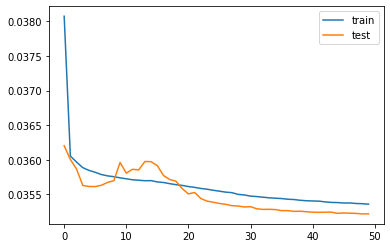

In [6]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
#pyplot.show()
 


In [7]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.406
